link dataset: https://www.kaggle.com/datasets/luisfredgs/imdb-ptbr

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip freeze

In [2]:
import pandas as pd

In [3]:
resenha = pd.read_csv('/content/drive/MyDrive/codealura/imdb-reviews-pt-br.csv')
resenha.tail()

id                                            text_en  \
49454  49456  Seeing as the vote average was pretty low, and...   
49455  49457  The plot had some wretched, unbelievable twist...   
49456  49458  I am amazed at how this movieand most others h...   
49457  49459  A Christmas Together actually came before my t...   
49458  49460  Working-class romantic drama from director Mar...   

                                                 text_pt sentiment  
49454  Como a média de votos era muito baixa, e o fat...       pos  
49455  O enredo teve algumas reviravoltas infelizes e...       pos  
49456  Estou espantado com a forma como este filme e ...       pos  
49457  A Christmas Together realmente veio antes do m...       pos  
49458  O drama romântico da classe trabalhadora do di...       pos

In [4]:
from sklearn.model_selection import train_test_split

treino, teste, classe_treino, classe_teste = train_test_split(resenha.text_pt,
                                                              resenha.sentiment,
                                                              random_state = 42)

In [5]:
# from sklearn.linear_model import LogisticRegression

# """
# LogisticRegression calcula a probabilidade de uma instância pertencer a uma classe ou outra, usando binarização.
# """

# regressao_logistica = LogisticRegression()
# regressao_logistica.fit(treino, classe_treino)
# acuracia = regressao_logistica.score(teste, classe_teste)
# acuracia

In [6]:
print(resenha.sentiment.value_counts())

sentiment
neg    24765
pos    24694
Name: count, dtype: int64


In [7]:
classificacao = resenha["sentiment"].replace(["neg", "pos"], [0,1])

In [8]:
resenha["classificacao"] = classificacao
resenha

id                                            text_en  \
0          1  Once again Mr. Costner has dragged out a movie...   
1          2  This is an example of why the majority of acti...   
2          3  First of all I hate those moronic rappers, who...   
3          4  Not even the Beatles could write songs everyon...   
4          5  Brass pictures movies is not a fitting word fo...   
...      ...                                                ...   
49454  49456  Seeing as the vote average was pretty low, and...   
49455  49457  The plot had some wretched, unbelievable twist...   
49456  49458  I am amazed at how this movieand most others h...   
49457  49459  A Christmas Together actually came before my t...   
49458  49460  Working-class romantic drama from director Mar...   

                                                 text_pt sentiment  \
0      Mais uma vez, o Sr. Costner arrumou um filme p...       neg   
1      Este é um exemplo do motivo pelo qual a maiori...       neg   
2      Primeiro de tudo eu odeio esses raps imbecis, ...       neg   
3      Nem mesmo os Beatles puderam escrever músicas ...       neg   
4      Filmes de fotos de latão não é uma palavra apr...       neg   
...                                                  ...       ...   
49454  Como a média de votos era muito baixa, e o fat...       pos   
49455  O enredo teve algumas reviravoltas infelizes e...       pos   
49456  Estou espantado com a forma como este filme e ...       pos   
49457  A Christmas Together realmente veio antes do m...       pos   
49458  O drama romântico da classe trabalhadora do di...       pos   

       classificacao  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
49454              1  
49455              1  
49456              1  
49457              1  
49458              1  

[49459 rows x 5 columns]

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

texto = ['Assisti um filme otimo','Assisti filme ruim']

vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(texto)


In [10]:
vetorizar.get_feature_names_out()

array(['Assisti', 'filme', 'otimo', 'ruim', 'um'], dtype=object)

In [11]:
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [12]:
# transforma minha matriz esparsa em um dataframe
matriz = pd.DataFrame.sparse.from_spmatrix(bag_of_words,
                                           columns=vetorizar.get_feature_names_out())

In [13]:
matriz

Assisti  filme  otimo  ruim  um
0        1      1      1     0   1
1        1      1      0     1   0

In [14]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(resenha['text_pt'])
bag_of_words.shape

(49459, 50)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              resenha.classificacao,
                                                              random_state = 42)


regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia = regressao_logistica.score(teste, classe_teste)
acuracia

0.6583097452486858

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                                texto[coluna_classificacao],
                                                                random_state = 42)


    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(treino, classe_treino)
    acuracia = regressao_logistica.score(teste, classe_teste)
    return acuracia

print(classificar_texto(resenha, "text_pt", "classificacao"))

0.6583097452486858


In [17]:
todas_palavras = ' '.join([texto for texto in resenha.text_pt])
# len(todas_palavras)

In [18]:
# word cloud
%matplotlib inline
from wordcloud import WordCloud

nuvem_palavras = WordCloud(width=800, height=500,
                           max_font_size=110, collocations=False).generate(todas_palavras)

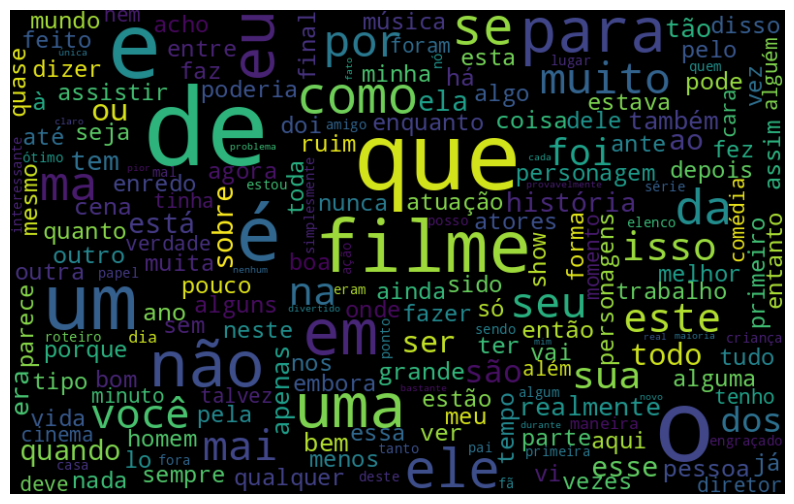

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()


In [20]:
resenha.query("sentiment == 'pos'")

id                                            text_en  \
12389  12391  I went and saw this movie last night after bei...   
12390  12392  Actor turned director Bill Paxton follows up h...   
12391  12393  As a recreational golfer with some knowledge o...   
12392  12394  I saw this film in a sneak preview, and it is ...   
12393  12395  Bill Paxton has taken the true story of the 19...   
...      ...                                                ...   
49454  49456  Seeing as the vote average was pretty low, and...   
49455  49457  The plot had some wretched, unbelievable twist...   
49456  49458  I am amazed at how this movieand most others h...   
49457  49459  A Christmas Together actually came before my t...   
49458  49460  Working-class romantic drama from director Mar...   

                                                 text_pt sentiment  \
12389  Eu fui e vi este filme ontem à noite depois de...       pos   
12390  O diretor do ator, Bill Paxton, segue sua prom...       pos   
12391  Como um jogador de recreio com algum conhecime...       pos   
12392  Eu vi esse filme em uma prévia, e é delicioso....       pos   
12393  Bill Paxton levou a verdadeira história do gol...       pos   
...                                                  ...       ...   
49454  Como a média de votos era muito baixa, e o fat...       pos   
49455  O enredo teve algumas reviravoltas infelizes e...       pos   
49456  Estou espantado com a forma como este filme e ...       pos   
49457  A Christmas Together realmente veio antes do m...       pos   
49458  O drama romântico da classe trabalhadora do di...       pos   

       classificacao  
12389              1  
12390              1  
12391              1  
12392              1  
12393              1  
...              ...  
49454              1  
49455              1  
49456              1  
49457              1  
49458              1  

[24694 rows x 5 columns]

In [21]:
def nuvem_palavras_neg(texto, coluna_texto):
    texto_negativo = texto.query("sentiment == 'neg'")
    todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])
    nuvem_palavras = WordCloud(width=800, height=500,
                            max_font_size=110, collocations=False).generate(todas_palavras)

    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [22]:
def nuvem_palavras_pos(texto, coluna_texto):
    texto_positivo = texto.query("sentiment == 'pos'")
    todas_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])
    nuvem_palavras = WordCloud(width=800, height=500,
                            max_font_size=110, collocations=False).generate(todas_palavras)

    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()

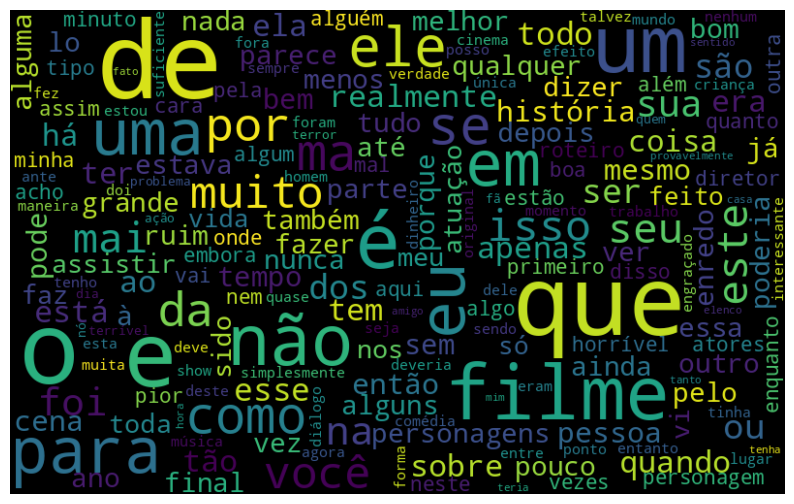

In [23]:
nuvem_palavras_neg(resenha, "text_pt")

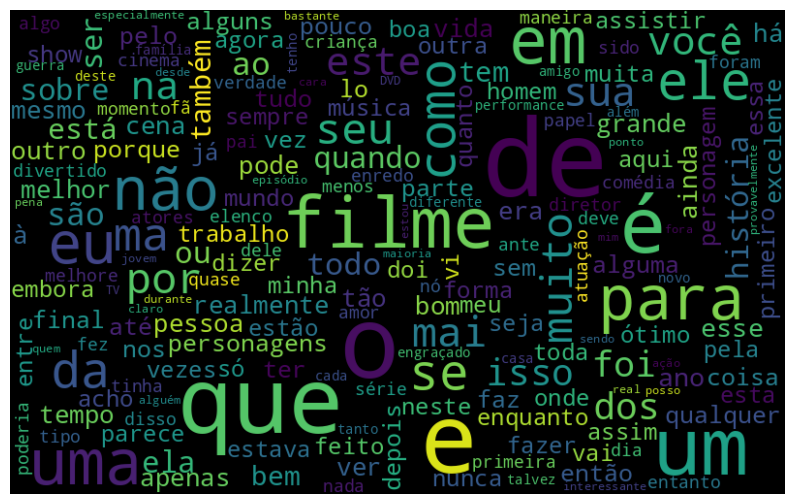

In [24]:
nuvem_palavras_pos(resenha, "text_pt")

In [25]:
import nltk
# nltk.download()
a = ['um filme ruim', 'um filme bom']
frequencia = nltk.FreqDist(a)
frequencia

FreqDist({'um filme ruim': 1, 'um filme bom': 1})

In [26]:
from nltk import tokenize

frase = 'bem vindo ao mundo pln'

token_espaco =  tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
token_frase

['bem', 'vindo', 'ao', 'mundo', 'pln']

In [27]:
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)

In [28]:
df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()),
                              'Frequencia': list(frequencia.values())})

In [29]:
df_frequencia.nlargest(columns='Frequencia', n = 10)

Palavra  Frequencia
20       de      417651
14      que      325070
42        e      299743
3         o      244881
7        um      216410
102       a      210179
45        é      192381
200      em      132778
1       uma      130888
29      não      127915

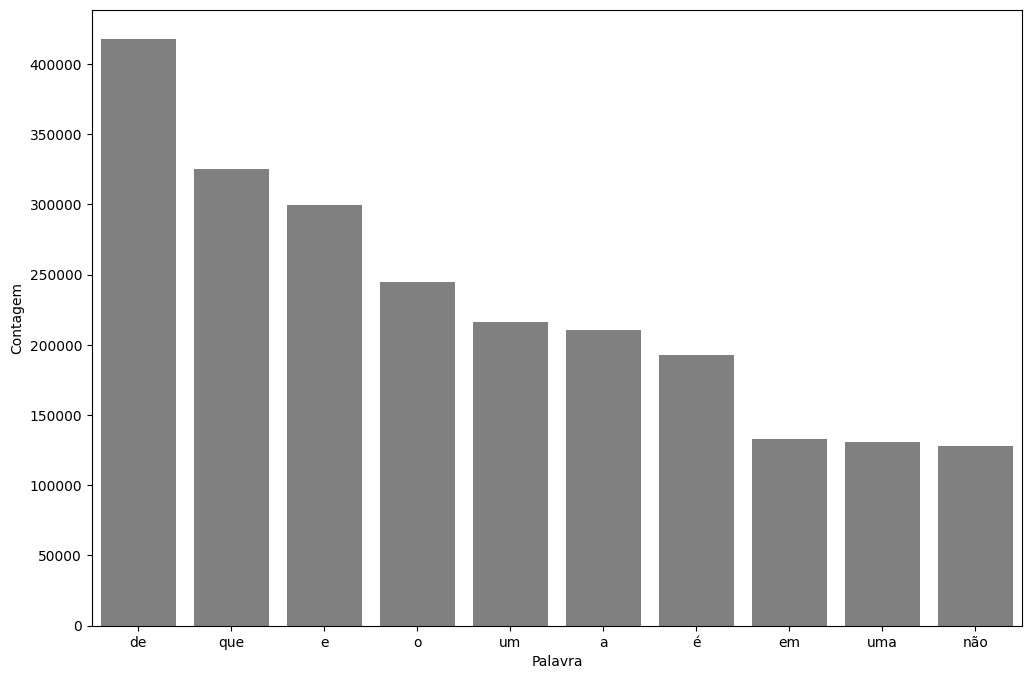

In [30]:
import seaborn as sns

plt.figure(figsize=(12, 8))
ax = sns.barplot(data = df_frequencia.nlargest(columns='Frequencia', n = 10), x = 'Palavra', y = 'Frequencia', color = 'gray')
ax.set(ylabel = 'Contagem')
plt.show()

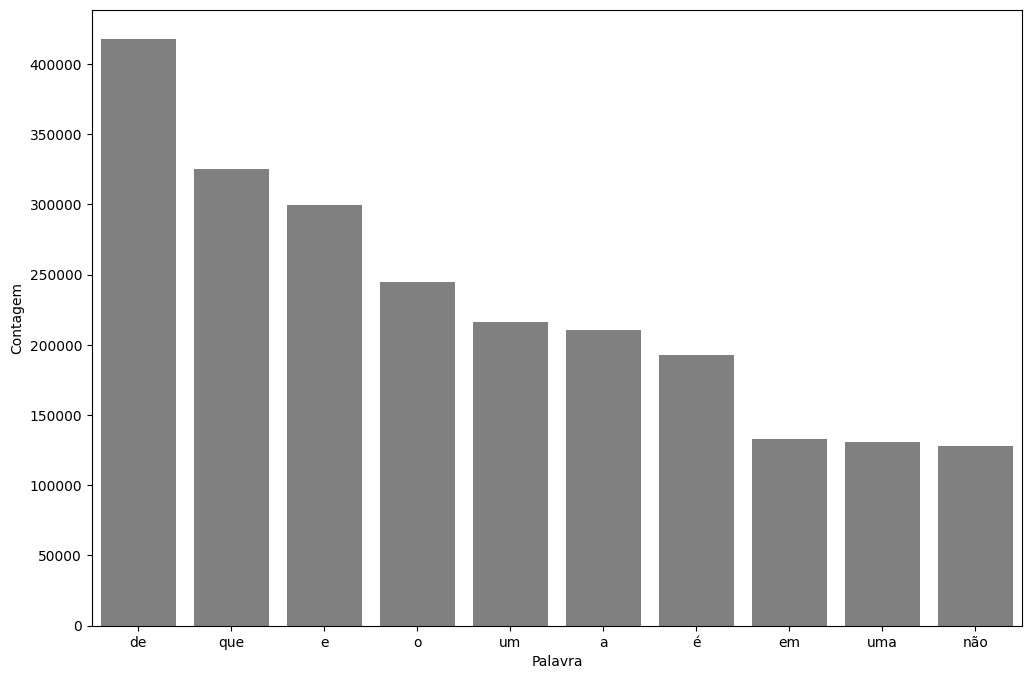

In [31]:
def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                   "Frequência": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x = "Palavra", y = "Frequência", color = 'gray')
    ax.set(ylabel = "Contagem")
    plt.show()

pareto(resenha, "text_pt", 10)

In [32]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [33]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")
# len(palavras_irrelevantes)

frase_processada = list()

for opiniao in resenha.text_pt:
    novafrase = list()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            novafrase.append(palavra)
    frase_processada.append(' '.join(novafrase))


resenha['tratamento_1'] = frase_processada

In [34]:
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  classificacao  \
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg              0   
1  Este é um exemplo do motivo pelo qual a maiori...       neg              0   
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg              0   
3  Nem mesmo os Beatles puderam escrever músicas ...       neg              0   
4  Filmes de fotos de latão não é uma palavra apr...       neg              0   

                                        tratamento_1  
0  Mais vez, Sr. Costner arrumou filme tempo nece...  
1  Este exemplo motivo maioria filmes ação mesmos...  
2  Primeiro tudo odeio raps imbecis, poderiam agi...  
3  Nem Beatles puderam escrever músicas todos gos...  
4  Filmes fotos latão palavra apropriada eles, ve...

In [35]:
classificar_texto(resenha, "tratamento_1", "classificacao")

0.6811160533764659

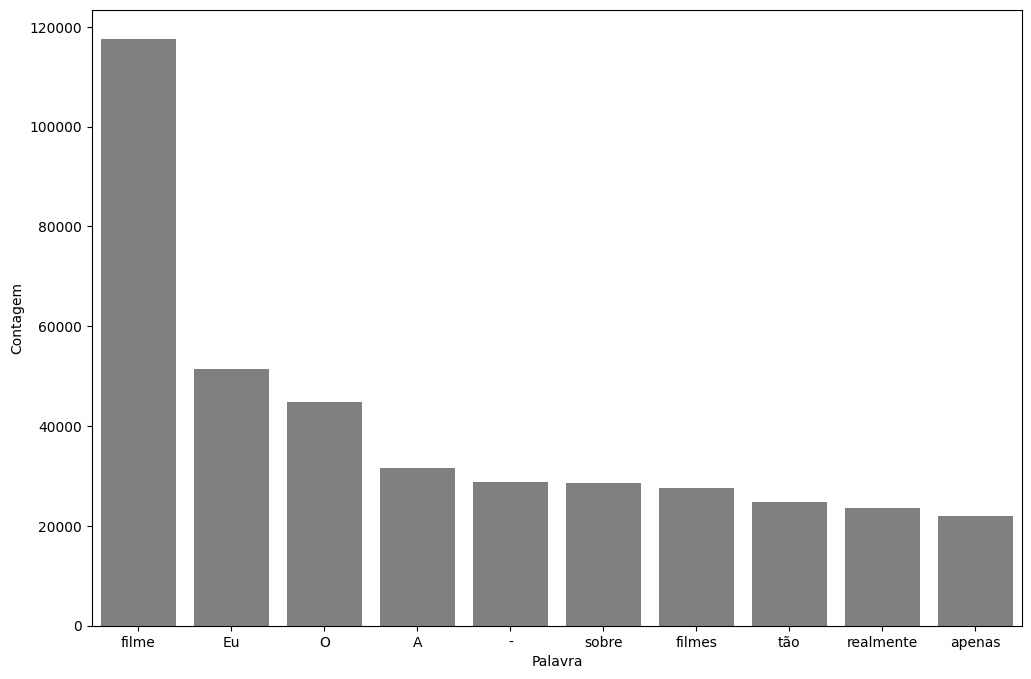

In [36]:
pareto(resenha, "tratamento_1", 10)

In [37]:
from nltk import tokenize

frase = 'ola mundo!'
token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)
token_frase

['ola', 'mundo', '!']

In [38]:
from string import punctuation
pontuacao = list()
for ponto in punctuation:
  pontuacao.append(ponto)

# pontuacao

pontuacao_stopwords = pontuacao + palavras_irrelevantes


frase_processada = list()
for opiniao in resenha["tratamento_1"]:
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(opiniao)
  for palavra in palavras_texto:
    if palavra not in pontuacao_stopwords:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))


resenha['tratamento_2'] = frase_processada

In [39]:
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  classificacao  \
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg              0   
1  Este é um exemplo do motivo pelo qual a maiori...       neg              0   
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg              0   
3  Nem mesmo os Beatles puderam escrever músicas ...       neg              0   
4  Filmes de fotos de latão não é uma palavra apr...       neg              0   

                                        tratamento_1  \
0  Mais vez, Sr. Costner arrumou filme tempo nece...   
1  Este exemplo motivo maioria filmes ação mesmos...   
2  Primeiro tudo odeio raps imbecis, poderiam agi...   
3  Nem Beatles puderam escrever músicas todos gos...   
4  Filmes fotos latão palavra apropriada eles, ve...   

                                        tratamento_2  
0  Mais vez Sr Costner arrumou filme tempo necess...  
1  Este exemplo motivo maioria filmes ação mesmos...  
2  Primeiro tudo odeio raps imbecis poderiam agir...  
3  Nem Beatles puderam escrever músicas todos gos...  
4  Filmes fotos latão palavra apropriada verdade ...

In [40]:
resenha['tratamento_1'][0]

'Mais vez, Sr. Costner arrumou filme tempo necessário. Além terríveis seqüências resgate mar, quais poucas, simplesmente importei nenhum personagens. A maioria fantasmas armário, personagem Costers realizado logo início, esquecido tarde, importava. O personagem deveríamos importar arrogante superconfiante, Ashton Kutcher. O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado. Seu único obstáculo parece vencendo Costner. Finalmente, bem além meio caminho, Costner conta sobre fantasmas Kutchers. Somos informados Kutcher levado melhor pressentimentos presságios anteriores. Nenhuma mágica aqui, tudo podia fazer desligar hora.'

In [41]:
resenha['tratamento_2'][0]

'Mais vez Sr Costner arrumou filme tempo necessário Além terríveis seqüências resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armário personagem Costers realizado logo início esquecido tarde importava O personagem deveríamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado Seu único obstáculo parece vencendo Costner Finalmente bem além meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado melhor pressentimentos presságios anteriores Nenhuma mágica aqui tudo podia fazer desligar hora'

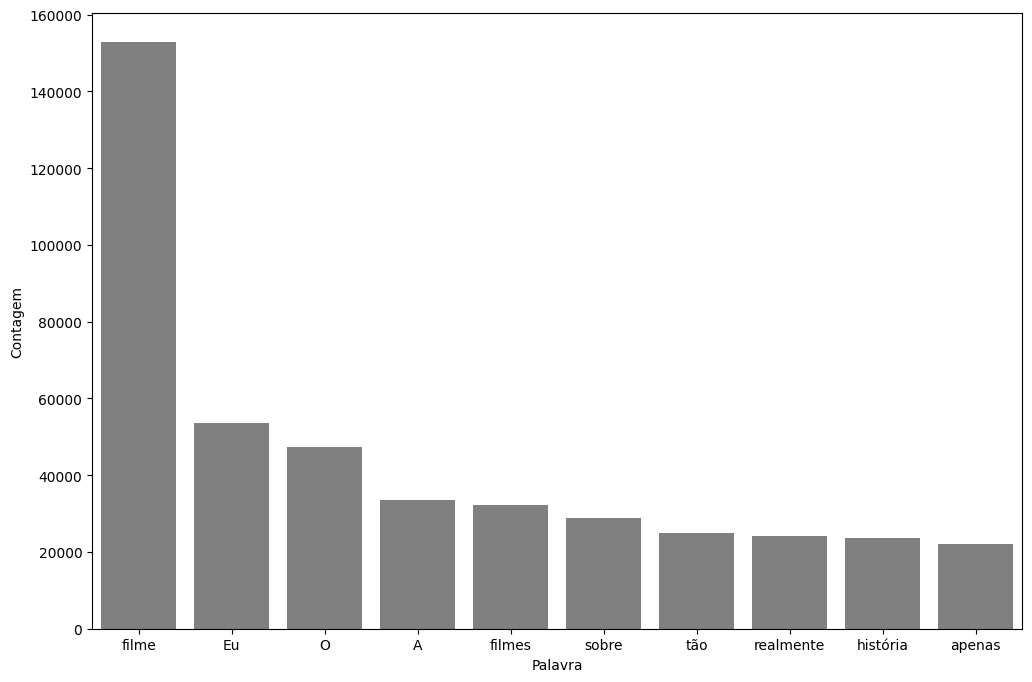

In [43]:
pareto(resenha, "tratamento_2", 10)

In [ ]:
!pip install unidecode

In [ ]:
import unidecode

acentos = "ótimo péssimo não é tão"

teste = unidecode.unidecode(acentos)
teste

In [48]:
sem_acentros = [unidecode.unidecode(texto) for texto in resenha['tratamento_2']]

In [49]:
sem_acentros[0]

'Mais vez Sr Costner arrumou filme tempo necessario Alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armario personagem Costers realizado logo inicio esquecido tarde importava O personagem deveriamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado Seu unico obstaculo parece vencendo Costner Finalmente bem alem meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado melhor pressentimentos pressagios anteriores Nenhuma magica aqui tudo podia fazer desligar hora'

In [50]:
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

In [ ]:
stopwords_sem_acento

In [55]:
resenha['tratamento_3'] = sem_acentros

frase_processada = list()
for opiniao in resenha["tratamento_2"]:
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(opiniao)
  for palavra in palavras_texto:
    if palavra not in pontuacao_stopwords:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))


resenha['tratamento_3'] = frase_processada

In [56]:
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  classificacao  \
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg              0   
1  Este é um exemplo do motivo pelo qual a maiori...       neg              0   
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg              0   
3  Nem mesmo os Beatles puderam escrever músicas ...       neg              0   
4  Filmes de fotos de latão não é uma palavra apr...       neg              0   

                                        tratamento_1  \
0  Mais vez, Sr. Costner arrumou filme tempo nece...   
1  Este exemplo motivo maioria filmes ação mesmos...   
2  Primeiro tudo odeio raps imbecis, poderiam agi...   
3  Nem Beatles puderam escrever músicas todos gos...   
4  Filmes fotos latão palavra apropriada eles, ve...   

                                        tratamento_2  \
0  Mais vez Sr Costner arrumou filme tempo necess...   
1  Este exemplo motivo maioria filmes ação mesmos...   
2  Primeiro tudo odeio raps imbecis poderiam agir...   
3  Nem Beatles puderam escrever músicas todos gos...   
4  Filmes fotos latão palavra apropriada verdade ...   

                                        tratamento_3  
0  Mais vez Sr Costner arrumou filme tempo necess...  
1  Este exemplo motivo maioria filmes ação mesmos...  
2  Primeiro tudo odeio raps imbecis poderiam agir...  
3  Nem Beatles puderam escrever músicas todos gos...  
4  Filmes fotos latão palavra apropriada verdade ...

In [57]:
acuracia_tratamento3 = classificar_texto(resenha, "tratamento_3", "classificacao")

In [58]:
acuracia_tratamento3

0.6892033966841893

In [60]:
acuracia # antiga

0.6583097452486858

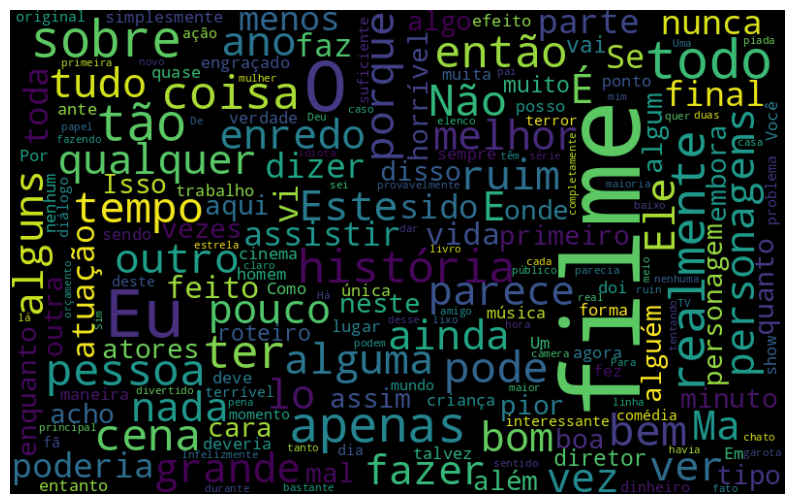

In [61]:
nuvem_palavras_neg(resenha, "tratamento_3")

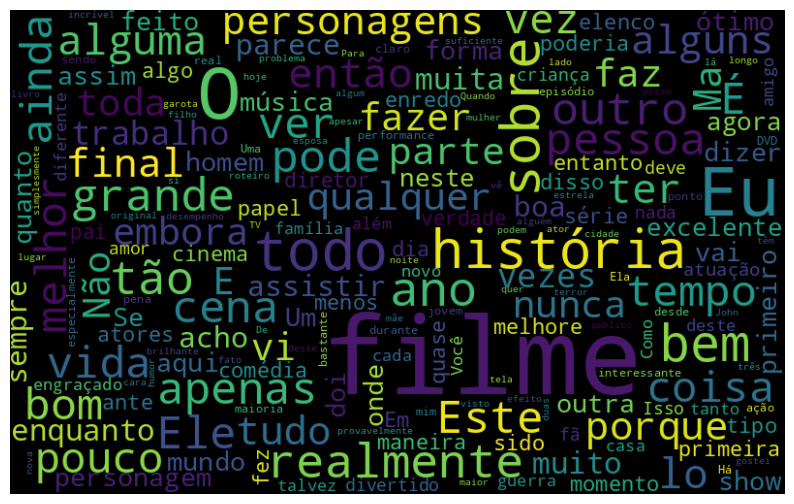

In [62]:
nuvem_palavras_pos(resenha, "tratamento_3")


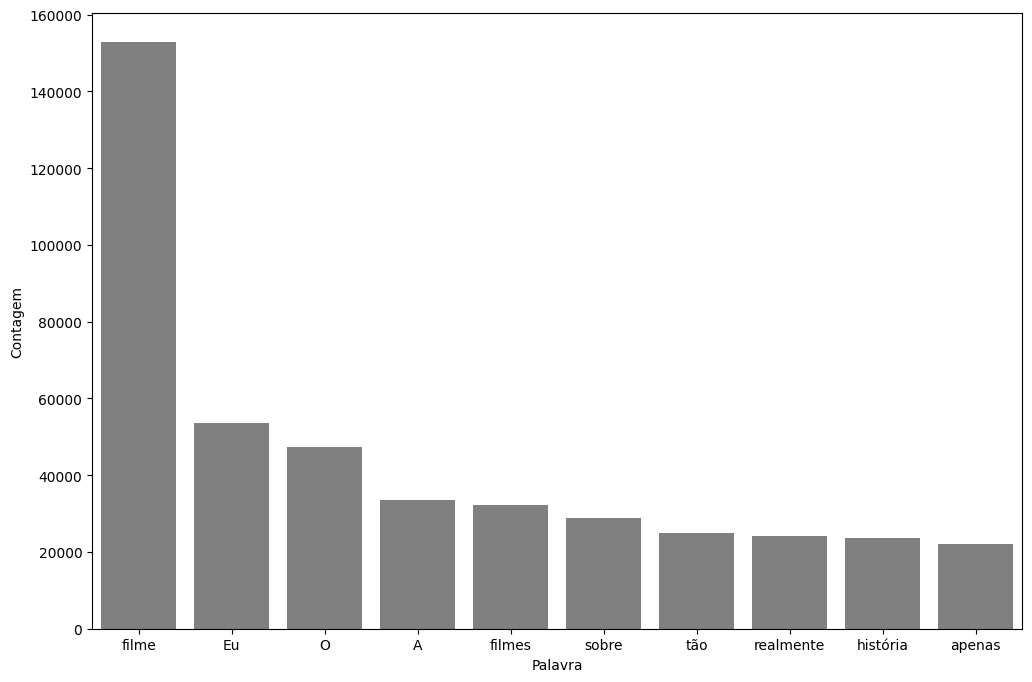

In [64]:
pareto(resenha, 'tratamento_3', 10)

In [66]:
frase = "O Thiago é o novo instrutor da Alura"
frase.lower()

'o thiago é o novo instrutor da alura'

In [68]:
frase_processada = list()
for opiniao in resenha["tratamento_3"]:
  nova_frase = list()
  opiniao = opiniao.lower()
  palavras_texto = token_pontuacao.tokenize(opiniao)
  for palavra in palavras_texto:
    if palavra not in stopwords_sem_acento:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))


resenha['tratamento_4'] = frase_processada

In [69]:
resenha['text_pt'][0]

'Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.'

In [70]:
resenha['tratamento_4'][0]

'vez sr costner arrumou filme tempo necessário além terríveis seqüências resgate mar quais poucas simplesmente importei nenhum personagens maioria fantasmas armário personagem costers realizado logo início esquecido tarde importava personagem deveríamos importar arrogante superconfiante ashton kutcher problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado único obstáculo parece vencendo costner finalmente bem além meio caminho costner conta sobre fantasmas kutchers informados kutcher levado melhor pressentimentos presságios anteriores nenhuma mágica aqui tudo podia fazer desligar hora'

In [71]:
acuracia_tratamento4 = classificar_texto(resenha, "tratamento_4", "classificacao")

In [72]:
acuracia_tratamento4

0.6909017387788111

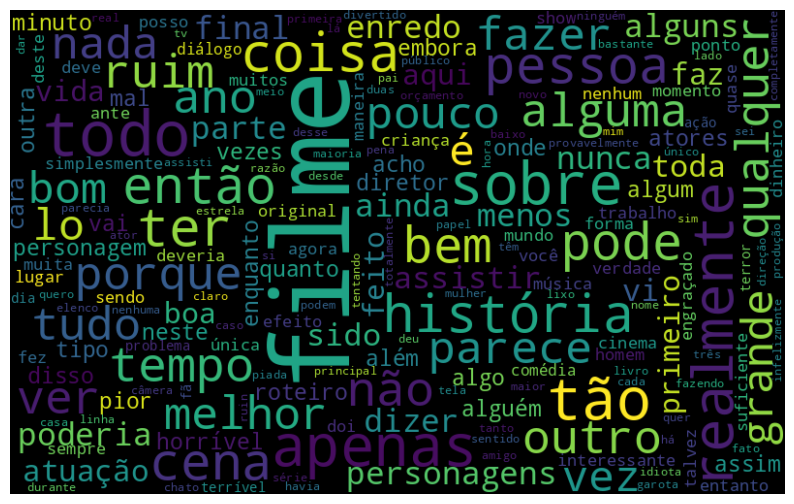

In [74]:
nuvem_palavras_neg(resenha, "tratamento_4")

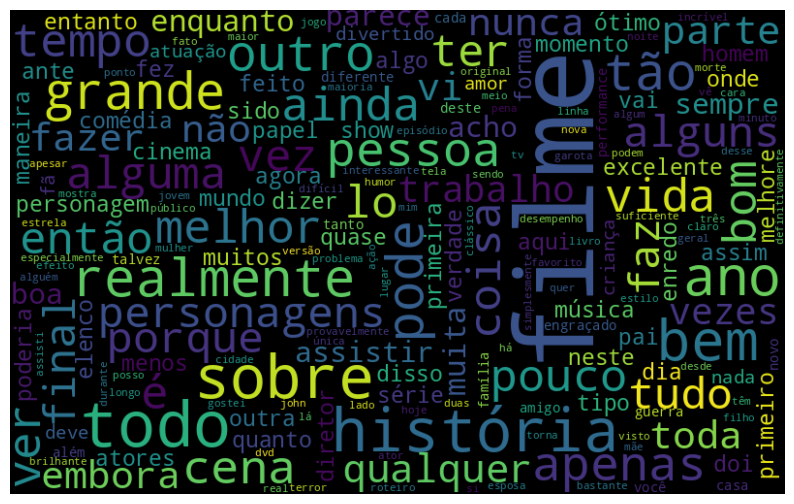

In [75]:
nuvem_palavras_pos(resenha, "tratamento_4")

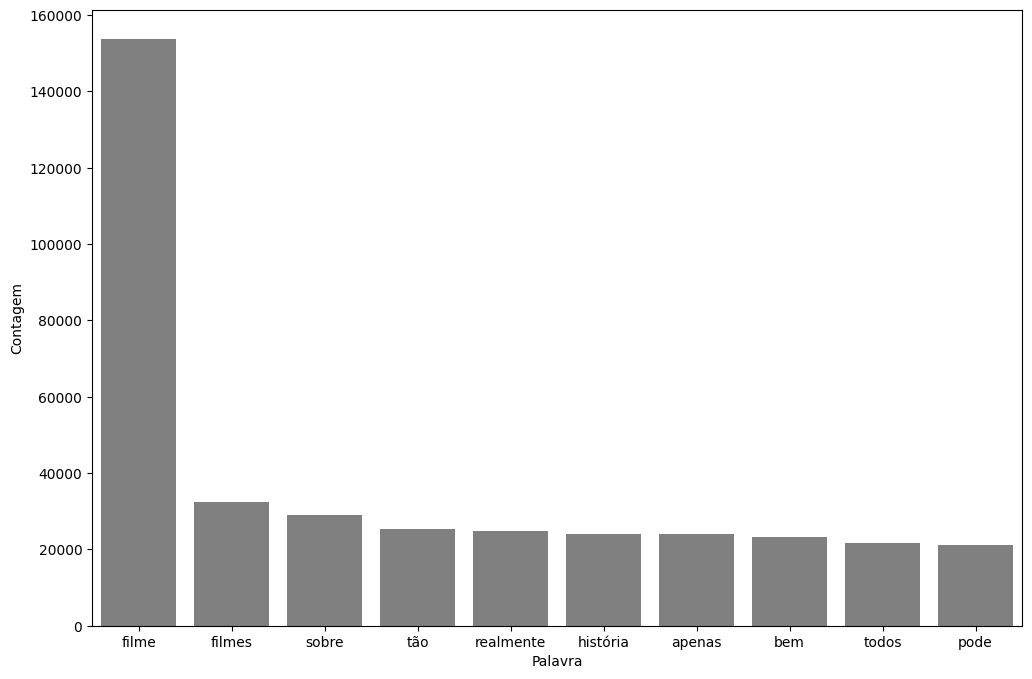

In [73]:
pareto(resenha, 'tratamento_4', 10)

In [77]:
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [79]:
stemmer = nltk.RSLPStemmer()  #reduzindo as palavras para um radical comum
stemmer.stem("correria")

'corr'

In [80]:
frase_processada = list()
for opiniao in resenha["tratamento_4"]:
  nova_frase = list()
  opiniao = opiniao.lower()
  palavras_texto = token_pontuacao.tokenize(opiniao)
  for palavra in palavras_texto:
      if palavra not in stopwords_sem_acento:
          nova_frase.append(stemmer.stem(palavra))
  frase_processada.append(' '.join(nova_frase))

resenha['tratamento_5'] = frase_processada

In [81]:
acuracia_tratamento5 = classificar_texto(resenha, "tratamento_5", "classificacao")
print(acuracia_tratamento5)
print(acuracia_tratamento4)

0.7024666397088556
0.6909017387788111


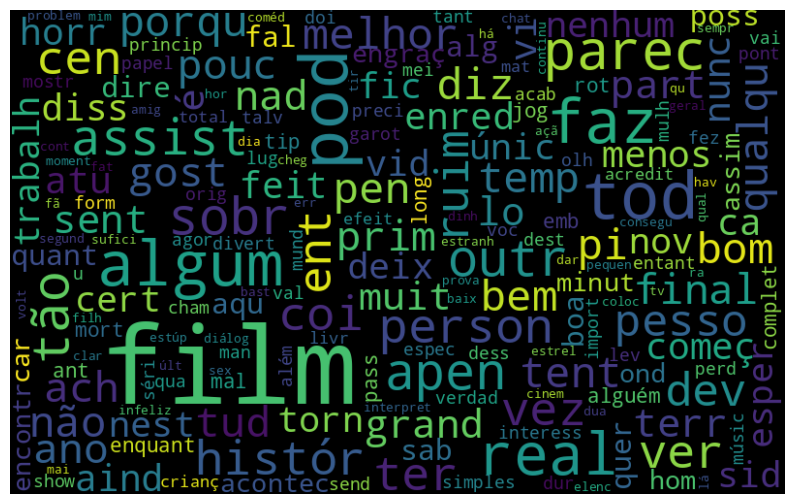

In [82]:
nuvem_palavras_neg(resenha, "tratamento_5")

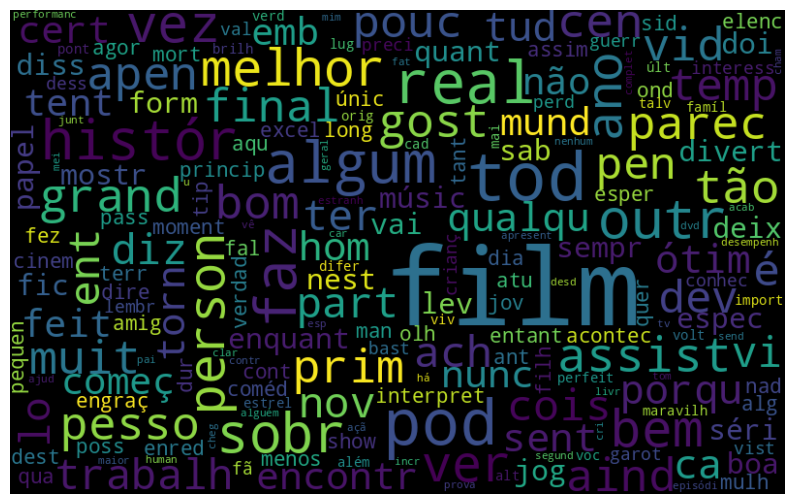

In [83]:
nuvem_palavras_pos(resenha, "tratamento_5")

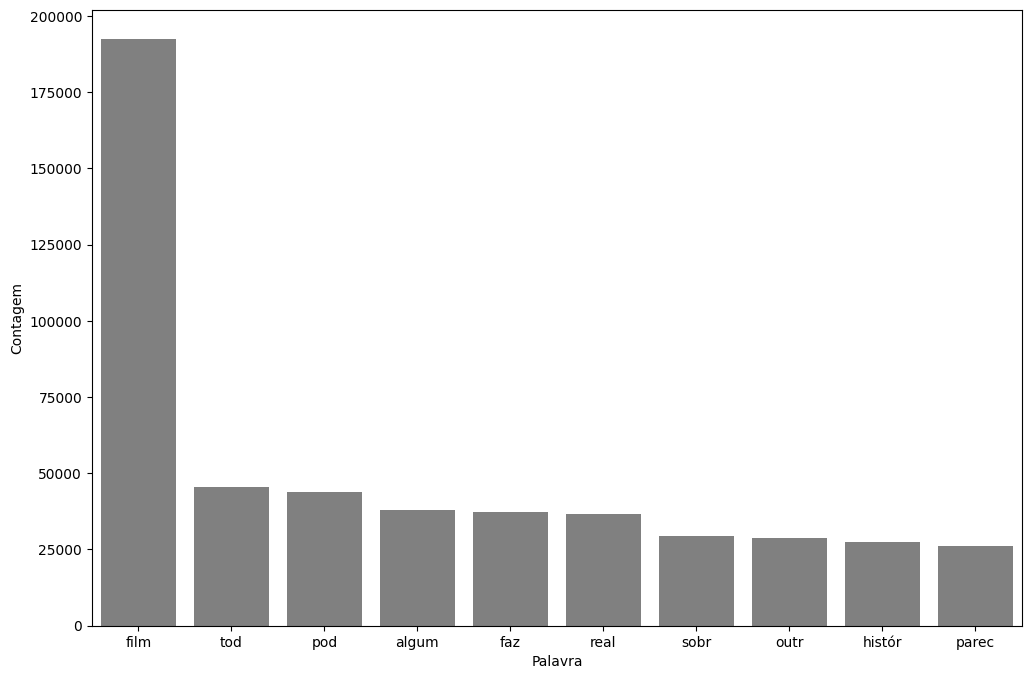

In [84]:
pareto(resenha, 'tratamento_5', 10)

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer

frases = ['asisti um ótimo', 'asisti um péssimo']

tfidf = TfidfVectorizer(lowercase=False, max_features=50)

caracteristicas = tfidf.fit_transform(frases)
pd.DataFrame(
    caracteristicas.todense(),
    columns=tfidf.get_feature_names_out()
)

asisti   péssimo        um     ótimo
0  0.501549  0.000000  0.501549  0.704909
1  0.501549  0.704909  0.501549  0.000000

In [91]:
tfidf_bruto = tfidf.fit_transform(resenha['text_pt'])

treino, teste, classe_treino, classe_teste = train_test_split(tfidf_bruto,
                                                              resenha['classificacao'],
                                                              random_state = 42)


regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_bruto = regressao_logistica.score(teste, classe_teste)
acuracia_tfidf_bruto

0.6600889607763849

In [92]:
tfidf_tratados = tfidf.fit_transform(resenha['tratamento_5'])

treino, teste, classe_treino, classe_teste = train_test_split(tfidf_tratados,
                                                              resenha['classificacao'],
                                                              random_state = 42)


regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_tratados = regressao_logistica.score(teste, classe_teste)
acuracia_tfidf_tratados

0.7024666397088556

In [96]:
from nltk import ngrams

frase = 'assisti um otimo filme.'

frase_separada = token_espaco.tokenize(frase)
pares = ngrams(frase_separada, 2)
list(pares)

[('assisti', 'um'), ('um', 'otimo'), ('otimo', 'filme.')]

In [109]:
tfidf_com = TfidfVectorizer(lowercase=False, ngram_range = (1,2))
vetor_tfidf = tfidf_com.fit_transform(resenha['tratamento_5'])


treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf,
                                                              resenha['classificacao'],
                                                              random_state = 42)


regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia_vetor_tfidf = regressao_logistica.score(teste, classe_teste)
acuracia_vetor_tfidf

0.883946623534169

In [110]:
tfidf_sem = TfidfVectorizer(lowercase=False)
vetor_tfidf = tfidf_sem.fit_transform(resenha['tratamento_5'])


treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf,
                                                              resenha['classificacao'],
                                                              random_state = 42)


regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia_vetor_tfidf = regressao_logistica.score(teste, classe_teste)
acuracia_vetor_tfidf

0.8803881924787708

In [124]:
feature_names = tfidf_com.get_feature_names_out()

coefficients = regressao_logistica.coef_[0]

min_length = min(len(feature_names), len(coefficients))
feature_names = feature_names[:min_length]
coefficients = coefficients[:min_length]

pesos = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

top_50_pesos = pesos.nlargest(50, 'Coefficient')
down_50_pesos = pesos.nsmallest(10, 'Coefficient')

In [123]:
top_50_pesos

Feature  Coefficient
68728        again sam     8.244177
22409        80 charli     8.001954
47603      acontec ver     6.579663
31574    abrig program     6.243899
23197          817 937     5.756704
39428       acert shan     5.236322
18566     40 hollywood     4.707685
2142           100 tud     4.697676
9415         1967 segu     4.286530
16707        25 passag     4.254639
29894    aborrec dolor     4.192200
51609      acting plot     4.174910
22983          80 serv     4.073561
2445       10d michael     3.923814
8629         1958 cran     3.639137
13313         1997 dur     3.576748
57582     admir escrit     3.566380
3328            13 ent     3.536225
39429      acert simon     3.507167
60045   adolf adventur     3.500160
2577    10second match     3.412130
29538       abord niil     3.378772
13810           1º ach     3.329592
31320       abraç mund     3.251063
19732          50 talv     3.211927
39359        acert mur     3.201753
4318               16h     3.196267
23123     80 wrestling     3.169219
24492           99 val     3.127752
37310      acarici tod     3.127109
59415  adolesc indifer     3.084222
27088    abenço coraçã     3.034246
29541    abord nostálg     2.994569
40736          ach emm     2.993019
60117     ador agradec     2.969532
21774            70 vá     2.937736
18083           37 fiz     2.896521
51843   actually contr     2.870118
60489         ador dvd     2.866084
55499      adic intens     2.840703
3236           13 1976     2.809880
34052     abund coment     2.745595
45098    acompanh send     2.714177
30563       abr cápsul     2.710651
7247         1942 film     2.652983
64562             afam     2.632309
47543  acontec triplet     2.630116
4345          16mm fog     2.625357
48642    acord telefon     2.616178
60046        adolf cel     2.555634

In [125]:
down_50_pesos

Feature  Coefficient
48068      acord compr    -9.247579
53683        adapt way    -9.200657
12111         1987 mão    -6.828602
30232      abort frank    -6.407879
43380    acident escri    -5.853274
31812   abrupt perturb    -5.317162
16566         24 pixel    -5.065671
37533         acas pai    -4.989813
32614  absolut restrit    -4.878744
43939         acim olh    -4.870944

In [128]:
pesos = pd.DataFrame(
    regressao_logistica.coef_[0].T,
    index = tfidf_sem.get_feature_names_out()
)

pesos.nlargest(50,0)

0
ótim        8.244177
excel       8.001954
perfeit     6.579663
incr        6.243899
favorit     5.756704
maravilh    5.236322
divert      4.707685
ador        4.697676
brilh       4.286530
definitiv   4.254639
hoj         4.192200
recom       4.174910
fant        4.073561
agrad       3.923814
bom         3.639137
cláss       3.576748
soberb      3.566380
ame         3.536225
maravilhos  3.507167
surpreend   3.500160
aind        3.412130
hil         3.378772
comov       3.329592
impression  3.251063
dvd         3.211927
mantém      3.201753
apreci      3.196267
fascin      3.169219
fort        3.127752
lind        3.127109
subestim    3.084222
gost        3.034246
hilari      2.994569
melhor      2.993019
sutil       2.969532
espec       2.937736
difer       2.896521
refresc     2.870118
sól         2.866084
sempr       2.840703
am          2.809880
jói         2.745595
obr         2.714177
human       2.710651
bem         2.652983
vai         2.632309
pequen      2.630116
aproveit    2.625357
poder       2.616178
surpres     2.555634

In [129]:
pesos.nsmallest(10,0)

0
pi      -9.247579
ruim    -9.200657
chat    -6.828602
horr    -6.407879
nad     -5.853274
infeliz -5.317162
decepç  -5.065671
lix     -4.989813
irrit   -4.878744
nenhum  -4.870944